# Analyse Exploratoire des Données E-commerce

Ce notebook présente une analyse détaillée des données e-commerce pour comprendre les tendances et comportements clients.

In [4]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style des graphiques
sns.set_theme()
sns.set_palette("husl")

# Lecture des données
df = pd.read_csv('../ecommerce_data_with_trends.csv')

# Conversion de la colonne timestamp en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

## 1. Aperçu des données

In [5]:
# Affichage des premières lignes et informations sur le dataset
print("Aperçu des données :")
display(df.head())

print("\nInformations sur le dataset :")
display(df.info())

print("\nStatistiques descriptives :")
display(df.describe())

Aperçu des données :


,transaction_id,timestamp,customer_id,customer_name,city,customer_type,product_name,category,price,quantity,total_amount
0,TX_89a20095-f7be-4bc1-bb58-a305e3fc8313,2023-10-30 03:01:46.571042,6933,David Hays,New Sabrina,B2C,Furniture Product_10,Home & Kitchen > Furniture,246.08,4,984.32
1,TX_a6b15a50-47b9-428c-b297-ce365acb061a,2023-10-30 03:06:07.918040,9328,Adam Oconnell,East Katherineton,B2C,Non-Fiction Product_15,Books > Non-Fiction,792.30,4,3169.20
2,TX_abdde2cb-3752-4399-84f4-c91c098b195f,2023-10-30 03:06:28.475922,6766,Jerry Brown,Lukefort,B2B,Bedding Product_1,Home & Kitchen > Bedding,685.73,40,27429.20
3,TX_ba162310-0807-4dee-818f-fa014f9880ef,2023-10-30 03:06:59.374222,9111,Craig Martinez,South Leonard,B2B,Shoes Product_11,Fashion > Shoes,404.96,96,38876.16
4,TX_60ec44fd-2172-4ffa-8c67-4b399c59ed7c,2023-10-30 03:08:29.580560,1763,David Wood,Jacksonstad,B2B,Supplements Product_5,Health & Personal Care > Supplements,927.67,35,32468.45



Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   transaction_id  1000000 non-null  object        
 1   timestamp       1000000 non-null  datetime64[ns]
 2   customer_id     1000000 non-null  int64         
 3   customer_name   1000000 non-null  object        
 4   city            1000000 non-null  object        
 5   customer_type   1000000 non-null  object        
 6   product_name    1000000 non-null  object        
 7   category        1000000 non-null  object        
 8   price           1000000 non-null  float64       
 9   quantity        1000000 non-null  int64         
 10  total_amount    1000000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 83.9+ MB


None


Statistiques descriptives :


,timestamp,customer_id,price,quantity,total_amount
count,1000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2024-04-29 15:33:04.211155456,5002.847309,510.471790,29.922302,15258.971813
min,2023-10-30 03:01:46.571042,1.000000,9.880000,1.000000,9.880000
25%,2024-01-29 13:05:04.882300416,2501.000000,273.140000,3.000000,1174.700000
50%,2024-04-29 10:59:44.511056896,5009.000000,532.440000,12.000000,3751.000000
75%,2024-07-29 22:02:20.116666112,7504.000000,751.120000,56.000000,23350.130000
max,2024-10-29 08:55:04.980340,10000.000000,998.530000,150.000000,131862.080000
std,NaN,2888.689217,280.779371,32.558757,20702.528840


## 2. Analyse des ventes et comportements d'achat

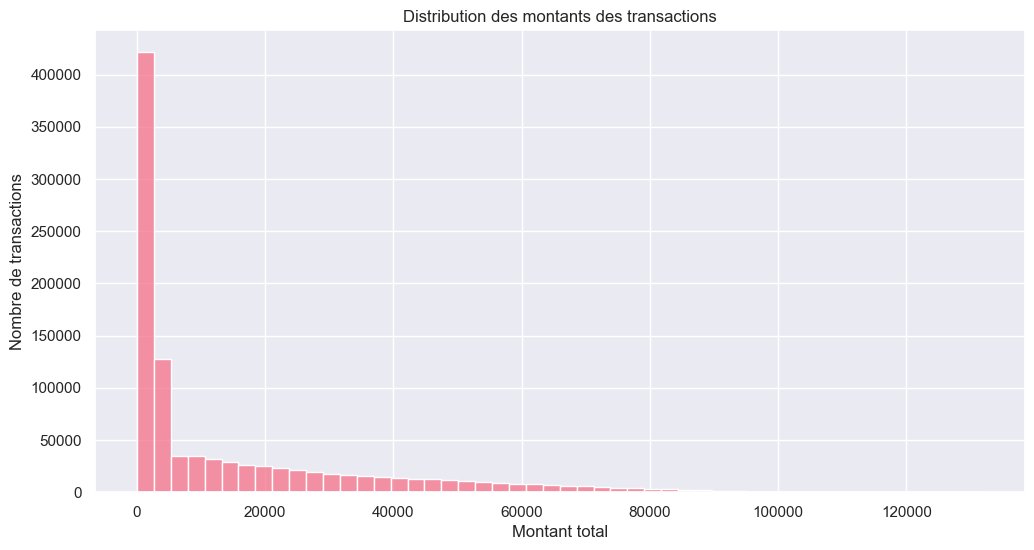

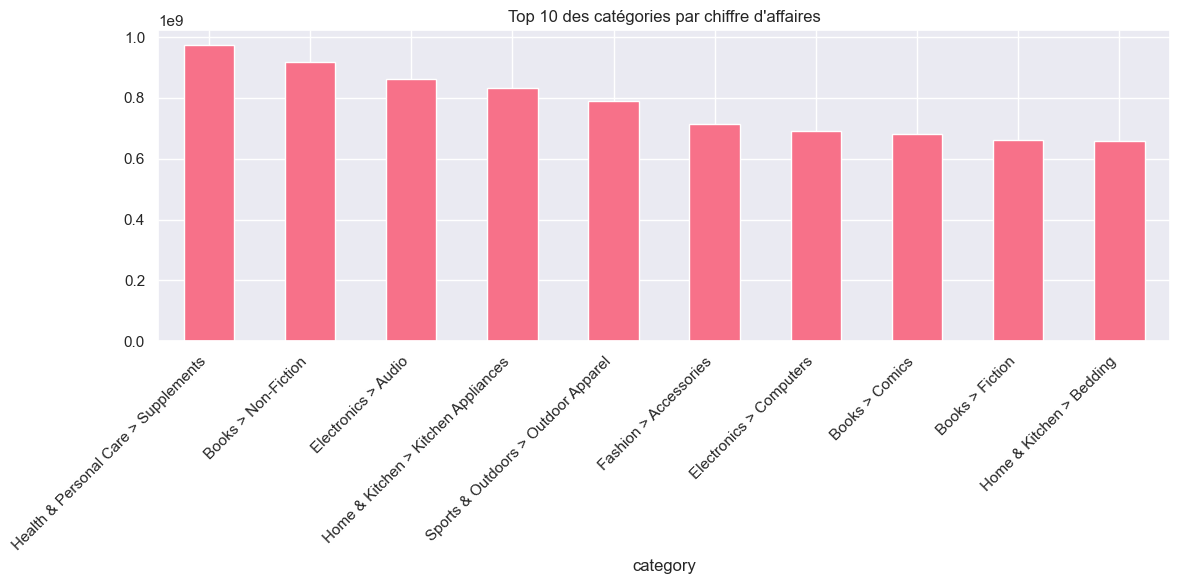

In [6]:
# Distribution des montants totaux des transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='total_amount', bins=50)
plt.title('Distribution des montants des transactions')
plt.xlabel('Montant total')
plt.ylabel('Nombre de transactions')
plt.show()

# Top 10 des catégories par chiffre d'affaires
category_sales = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.head(10).plot(kind='bar')
plt.title('Top 10 des catégories par chiffre d\'affaires')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3. Analyse des segments clients

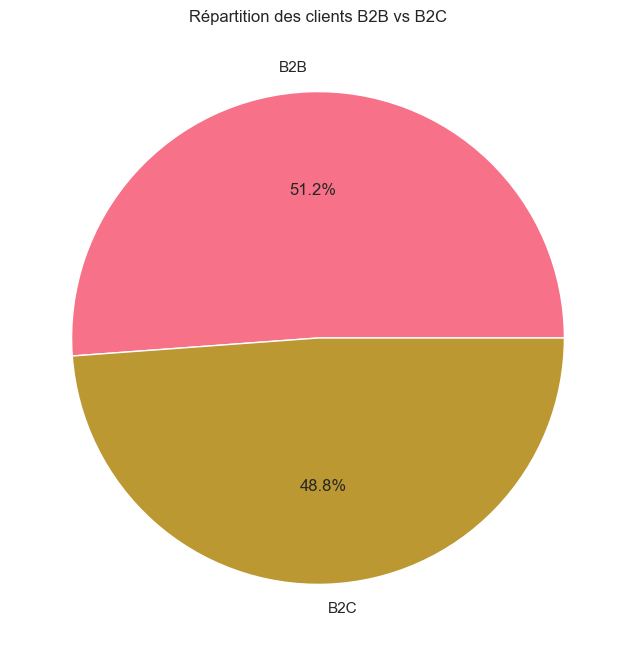


Moyenne des achats par type de client :


,mean,count
customer_type,,
B2B,28350.159853,511641
B2C,1543.675197,488359


In [7]:
# Répartition B2B vs B2C
customer_type_counts = df['customer_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index.to_list(), autopct='%1.1f%%')
plt.title('Répartition des clients B2B vs B2C')
plt.show()

# Moyenne des achats par type de client
avg_purchase_by_type = df.groupby('customer_type')['total_amount'].agg(['mean', 'count'])
print("\nMoyenne des achats par type de client :")
display(avg_purchase_by_type)

## 4. Analyse temporelle

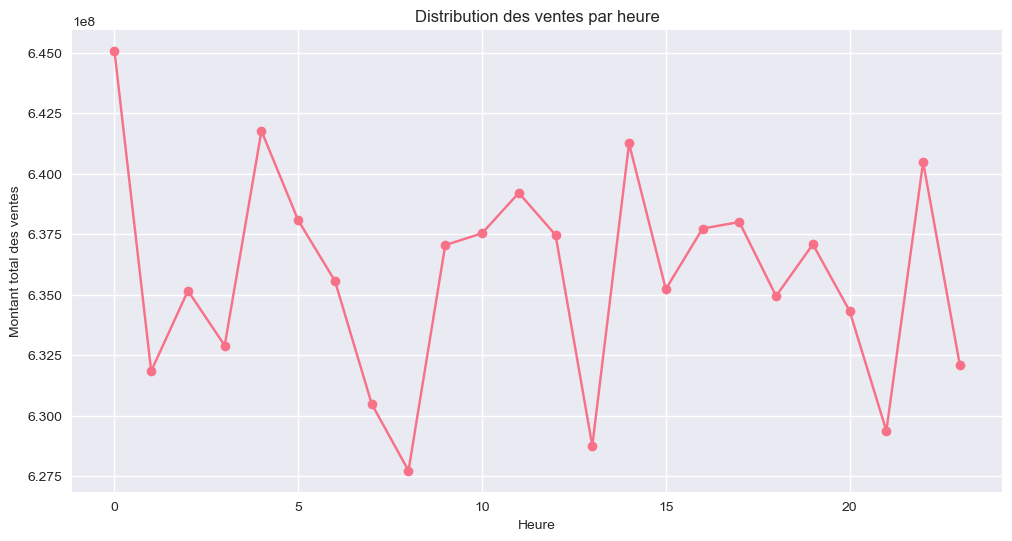

In [6]:
# Ajout de colonnes temporelles
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day

# Distribution des ventes par heure
hourly_sales = df.groupby('hour')['total_amount'].sum()

plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o')
plt.title('Distribution des ventes par heure')
plt.xlabel('Heure')
plt.ylabel('Montant total des ventes')
plt.grid(True)
plt.show()

## 5. Analyse des produits

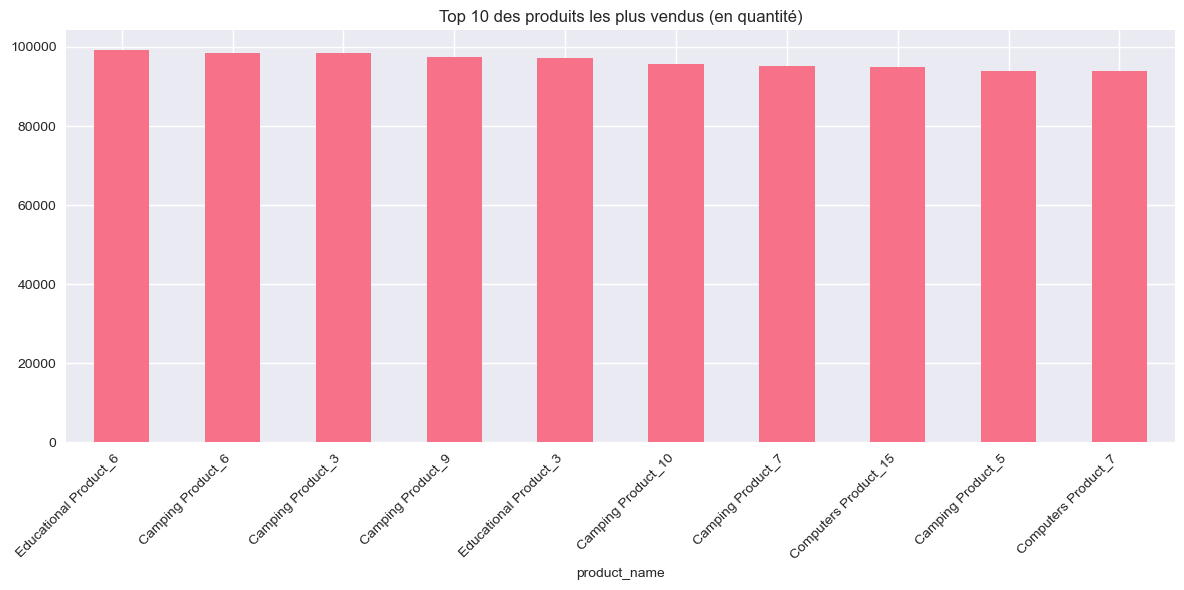

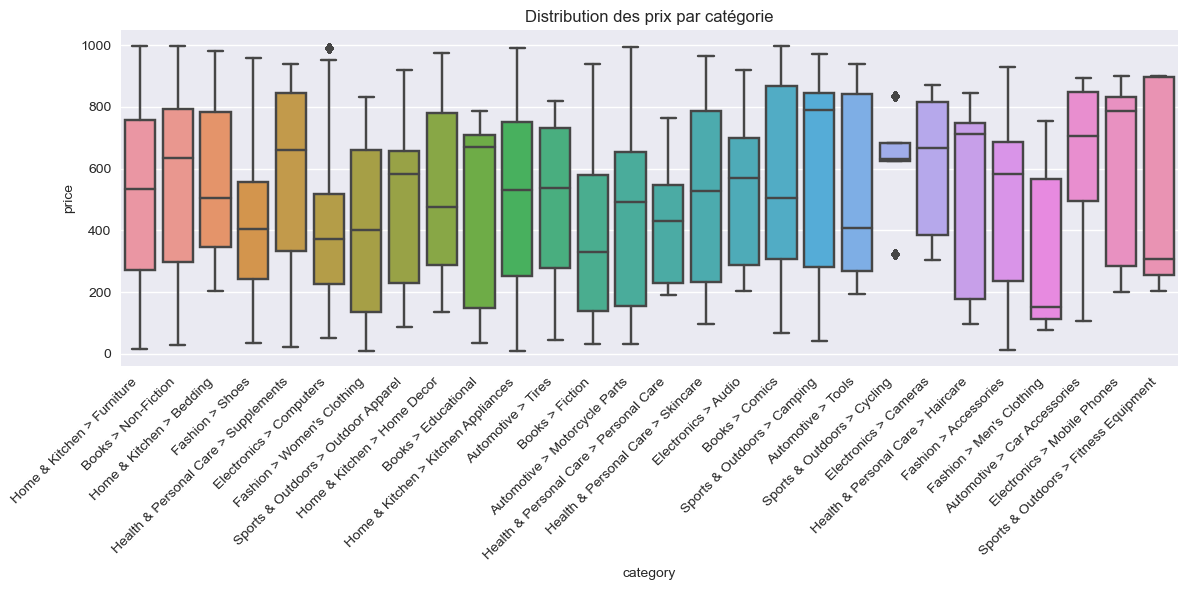

In [7]:
# Top 10 des produits les plus vendus en quantité
top_products = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
top_products.head(10).plot(kind='bar')
plt.title('Top 10 des produits les plus vendus (en quantité)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution des prix
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='price')
plt.title('Distribution des prix par catégorie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Insights clés

1. **Comportement d'achat** :
   - Analyse de la distribution des montants des transactions
   - Identification des catégories les plus performantes

2. **Segmentation client** :
   - Répartition entre clients B2B et B2C
   - Différences de comportement d'achat entre segments

3. **Tendances temporelles** :
   - Pics d'activité par heure
   - Patterns de vente journaliers

4. **Analyse produits** :
   - Produits les plus populaires
   - Variation des prix par catégorie